<a href="https://colab.research.google.com/github/qd6666/XBD-codes/blob/main/Image_Collection_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Dependencies

In [ ]:
!pip install opencv-python

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


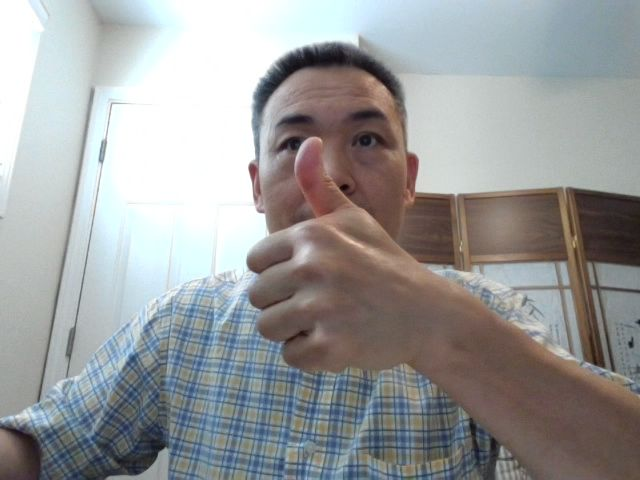

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# Import opencv
import cv2 

# Import uuid
import uuid

# Import Operating System
import os

# Import time
import time

# 2. Define Images to Collect

In [ ]:
labels = ['thumbsup', 'thumbsdown', 'thankyou', 'livelong']
number_imgs = 5

# 3. Setup Folders 

In [ ]:
IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'collectedimages')

In [ ]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

# 4. Capture Images

In [ ]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# 5. Image Labelling

In [ ]:
!pip install --upgrade pyqt5 lxml

  Using cached PyQt5-5.15.4-cp36.cp37.cp38.cp39-none-win_amd64.whl (6.8 MB)
  Using cached lxml-4.6.3-cp37-cp37m-win_amd64.whl (3.5 MB)
  Using cached PyQt5_sip-12.8.1-cp37-cp37m-win_amd64.whl (62 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)


In [ ]:
LABELIMG_PATH = os.path.join('Tensorflow', 'labelimg')

In [ ]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

Cloning into 'Tensorflow\labelimg'...


In [ ]:
if os.name == 'posix':
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd {LABELIMG_PATH} && python labelImg.py

Image:D:\YouTube\OD\TFODCourse\Tensorflow\workspace\images\collectedimages\thumbsup\thumbsup.6a706a36-940f-11eb-b4eb-5cf3709bbcc6.jpg -> Annotation:D:/YouTube/OD/TFODCourse/Tensorflow/workspace/images/collectedimages/thumbsup/thumbsup.6a706a36-940f-11eb-b4eb-5cf3709bbcc6.xml
Image:D:\YouTube\OD\TFODCourse\Tensorflow\workspace\images\collectedimages\thumbsup\thumbsup.6ba4d864-940f-11eb-8c74-5cf3709bbcc6.jpg -> Annotation:D:/YouTube/OD/TFODCourse/Tensorflow/workspace/images/collectedimages/thumbsup/thumbsup.6ba4d864-940f-11eb-8c74-5cf3709bbcc6.xml
Image:D:\YouTube\OD\TFODCourse\Tensorflow\workspace\images\collectedimages\thumbsup\thumbsup.6cd9c8e2-940f-11eb-b901-5cf3709bbcc6.jpg -> Annotation:D:/YouTube/OD/TFODCourse/Tensorflow/workspace/images/collectedimages/thumbsup/thumbsup.6cd9c8e2-940f-11eb-b901-5cf3709bbcc6.xml
Image:D:\YouTube\OD\TFODCourse\Tensorflow\workspace\images\collectedimages\thumbsup\thumbsup.6e0f5bc0-940f-11eb-8d18-5cf3709bbcc6.jpg -> Annotation:D:/YouTube/OD/TFODCourse

# 6. Move them into a Training and Testing Partition

# OPTIONAL - 7. Compress them for Colab Training

In [ ]:
TRAIN_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'train')
TEST_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'test')
ARCHIVE_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'archive.tar.gz')

In [ ]:
!tar -czf {ARCHIVE_PATH} {TRAIN_PATH} {TEST_PATH}